In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [7]:
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "imgs", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

__机器学习模型__和__训练算法__

本章讨论，机器学习模型的__理解__，__构建__，以及神经网络的__训练__

首先，以一个简单的线性回归模型，讨论两种不同的训练方式，得到模型的最优解
- 直接使用封闭方程进行求根运算，得到模型在当前训练集上的__最优参数__(即在训练集上使用损失函数达到最小的模型参数)
- 使用迭代优化方法：梯度下降(GD),
 - 在训练集上，逐渐调整模型参数以获得最小的损失函数，最终，参数会收敛到和第一种方法相同的值
 - 介绍一些梯度下降的变体形式：批量梯度下降(Bath GD)、小批量梯度下降(Mini-batch GD)、随机梯度下降(Stochastic GD)

接下来，研究更复杂的模型：多项式回归，它可以拟合非线性数据集
- 由于它比线性模型拥有__更多的参数__，于是它更容易出现模型的__过拟合__
- 因此，我将介绍如何通过__学习曲线__去判断模型是否出现过拟合
- 并介绍几种__正则化__方法以减少出现过拟合的风险

最后，将介绍两个常用于分类的模型：Logistic回归和Softmax回归

## 线性回归
一个简单的回归模型：$life\_satisfaction=\theta_0+\theta_1*GDP\_per\_capita$，该模型公公是输入量`GDP_per_capita`的线性函数，$\theta_0$和$\theta_1$是这个模型的参数

线性模型更一般化的描述指，通过计算__输入变量__的__加权和__，并加上一个__常数偏置__(截距项)来得到一个预测值。

如公式4-1：线性回归预测模型：$$\hat{y}=\theta_0+\theta_1*x_1+\theta_2*x_2+...+\theta_n*x_n$$
- $\hat{y}$表示预测结果
- $n$表示特征的个数
- $x_i$表示系`i`个特征的值
- $\theta_j$表示第`j`个参数(包括偏置项$\theta_{0}$和特征权重值$\theta_{1},\theta_{2},...\theta_{n}$)

怎样去训练一个线性回归模型？
- 训练一个模型指的是__设置模型的参数__，使得这个模型在训练集的表现较好
 - 首先，需要找到一个__衡量模型好坏的评定方法__，最常见的评定标准是__均方根误差(RMSE)__
 - 其次，找到一个$\theta$值，使得__均方根误差达到最小值__
 - 其实__均方误差__与__均方根误差__的$\theta$值相同，而且__最小化均方误差__比__最小化均方根误差__更简单


In [9]:
import numpy as np 
X=2*np.random.rand(100,1) 
X.shape
y=4+3*X+np.random.rand(100,1)
y.shape

(100, 1)

(100, 1)

Text(0.5, 0, '$x_1$')

Text(0, 0.5, '$y$')

[0, 2, 0, 15]

Saving figure generated_data_plot


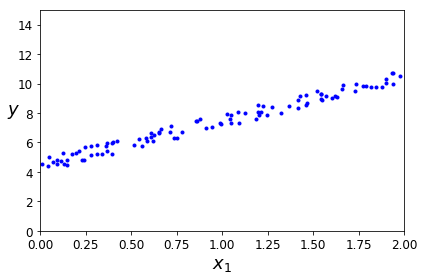

In [8]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

In [35]:
import numpy as np

# 将数据按照一定的格式合并
# np.r_ 第二维长度相同下，第一维长度相加，即两矩阵上下相加，
# np.c_ 第一维长度相同下，第二维长度相加，即两矩阵左右相加
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
c=np.c_[a,b]
c.shape
a.shape

r=np.r_[a,b,a]
r
r.shape


d =np.c_[a,b,a,b]
print("d==>",d)
print("dshape==>",d.shape)

c_cd=np.c_[c,d]
c_cd

c_ca=np.c_[c,a]
c_ca = np.c_[c_ca,a]
c_ca.shape

(3, 2)

(3,)

array([1, 2, 3, 4, 5, 6, 1, 2, 3])

(9,)

d==> [[1 4 1 4]
 [2 5 2 5]
 [3 6 3 6]]
dshape==> (3, 4)


array([[1, 4, 1, 4, 1, 4],
       [2, 5, 2, 5, 2, 5],
       [3, 6, 3, 6, 3, 6]])

(3, 4)